In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading Dataset
survey=pd.read_csv("survey_results_public.csv")
survey.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


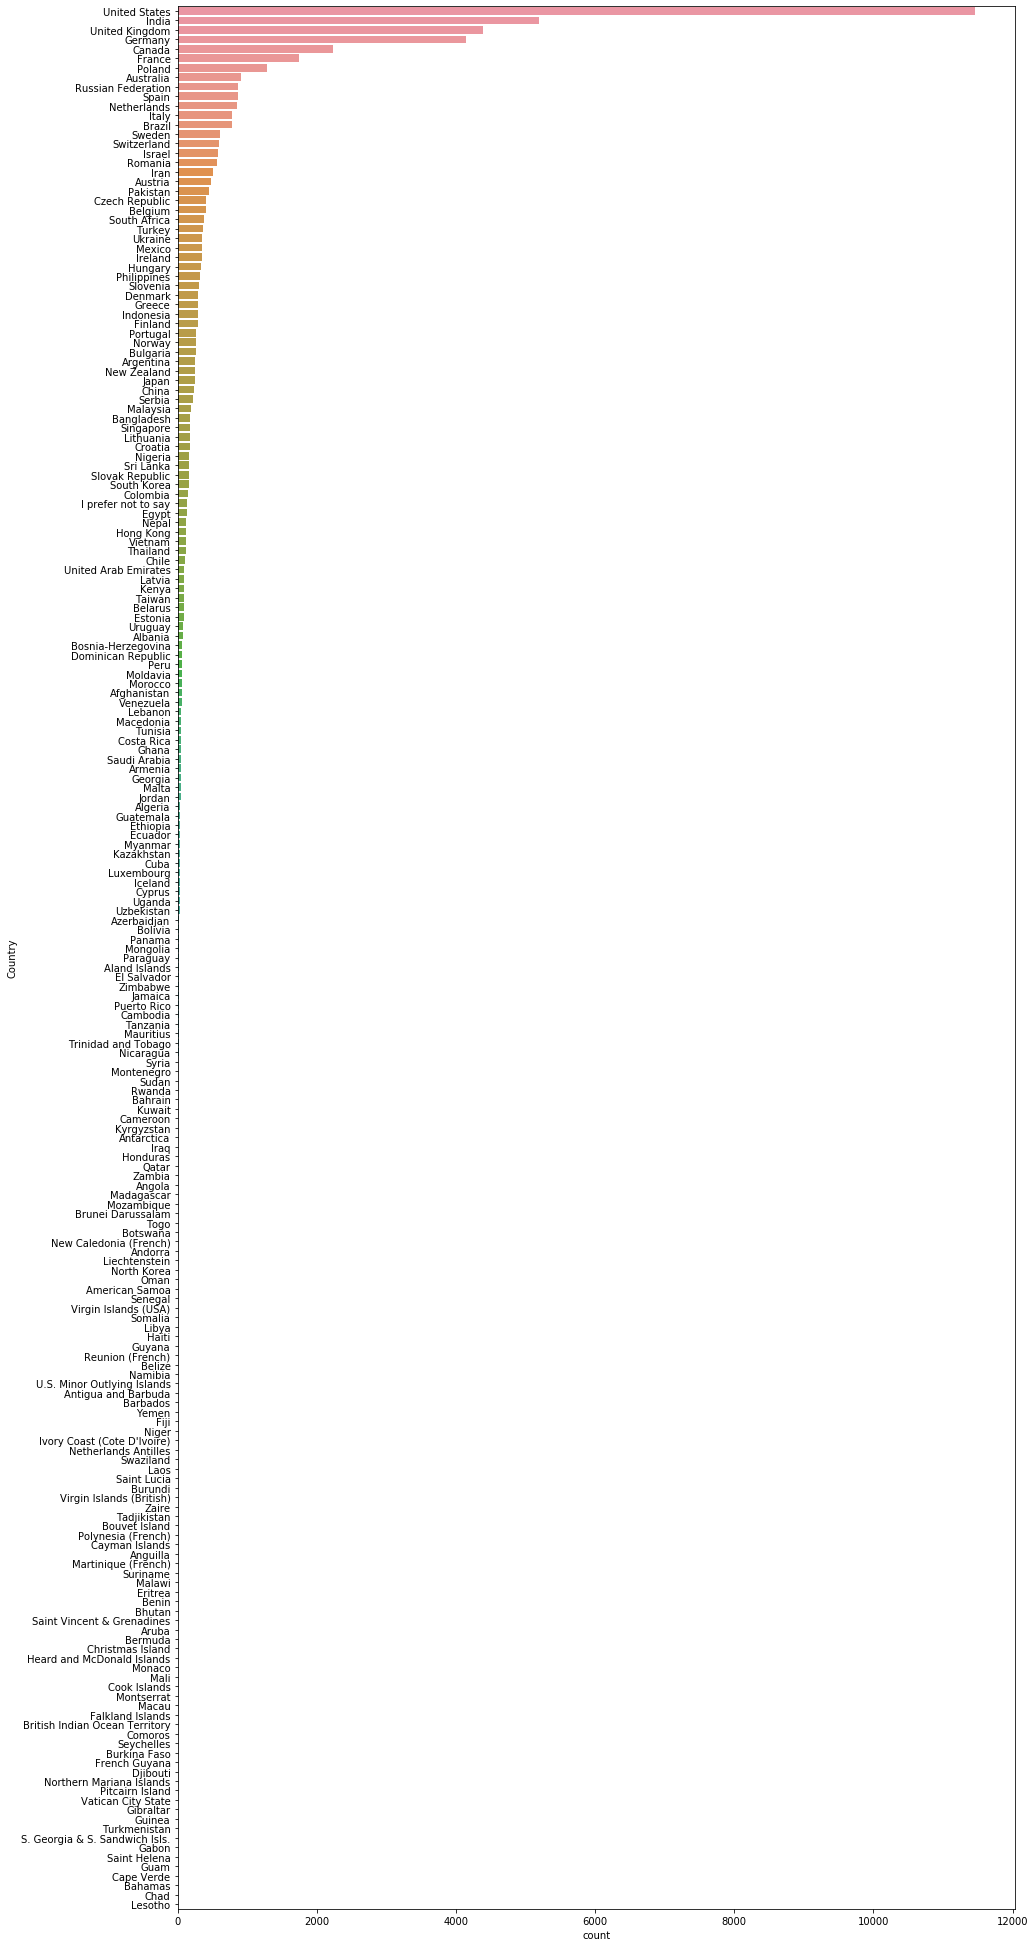

In [3]:
plt.subplots(figsize=(15,35))
sns.countplot(y=survey.Country,order=survey.Country.value_counts().index)

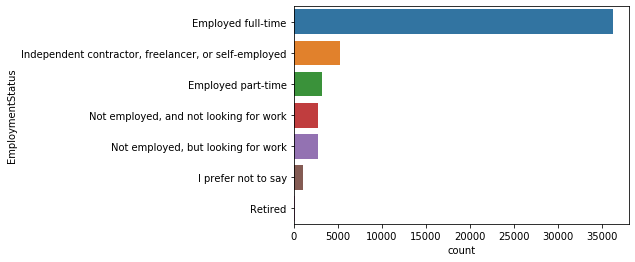

In [4]:
survey.EmploymentStatus.unique()
sns.countplot(y=survey.EmploymentStatus,order=survey.EmploymentStatus.value_counts().index)

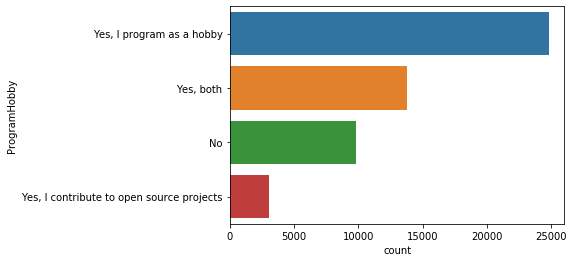

In [5]:
sns.countplot(y=survey.ProgramHobby,order=survey.ProgramHobby.value_counts().index)

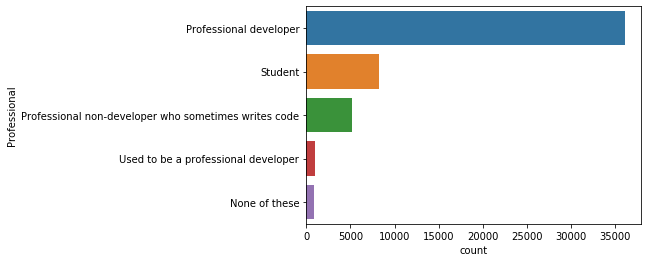

In [6]:
survey.Professional.unique()
sns.countplot(y=survey.Professional,order=survey.Professional.value_counts().index)

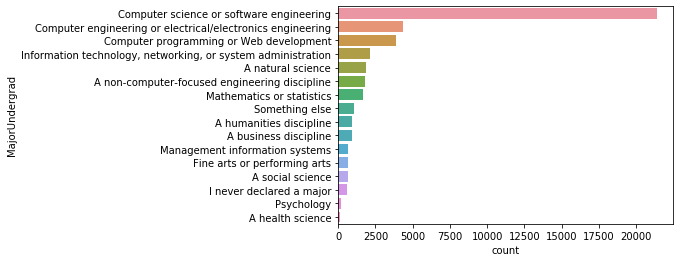

In [9]:
survey.MajorUndergrad.unique()
sns.countplot(y=survey.MajorUndergrad,order=survey.MajorUndergrad.value_counts().index)

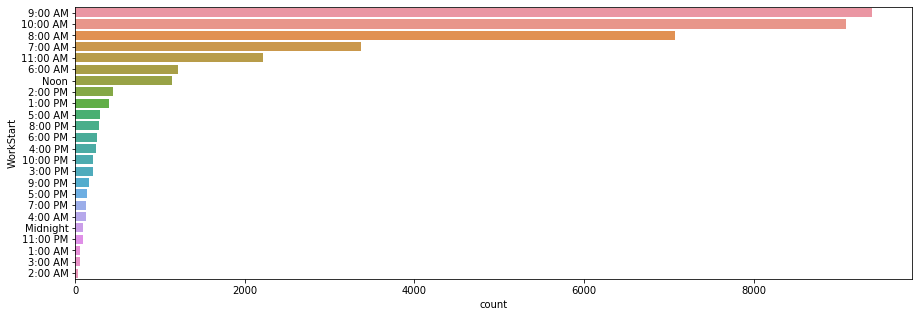

In [10]:
plt.subplots(figsize=(15,5))
survey.WorkStart.unique()
sns.countplot(y=survey.WorkStart,order=survey.WorkStart.value_counts().index)

In [14]:
from collections import Counter
temp=survey.HaveWorkedLanguage.drop(survey.loc[survey.HaveWorkedLanguage.isnull()].index)
languages=[]
row={}
for i in temp:
    if i is not None:
        types=i.split(";")
        languages.extend(types)
popularLanguages=Counter(languages).most_common(20)

languages=[i[0] for i in popularLanguages]
lang_count=[i[1] for i in popularLanguages]

df=pd.DataFrame()
df["Languages"]=languages
df["Number_of_Users"]=lang_count
df.head(20)

,Languages,Number_of_Users
0,SQL,18466
1,JavaScript,17159
2,Python,10719
3,PHP,9765
4,Java,8622
5,C#,8596
6,Java,5902
7,JavaScript,5716
8,C,5563
9,C++,4628


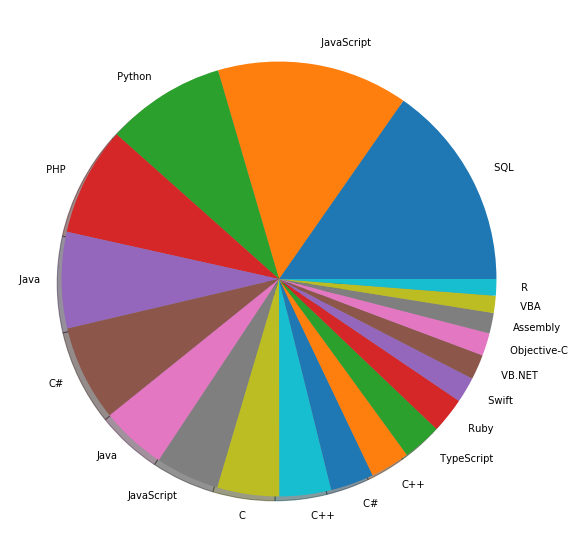

In [16]:
plt.subplots(figsize=(10,10))
plt.pie(df.Number_of_Users,labels=df.Languages,shadow=True,startangle=0);

Average Expected Salart=33142.22046770968


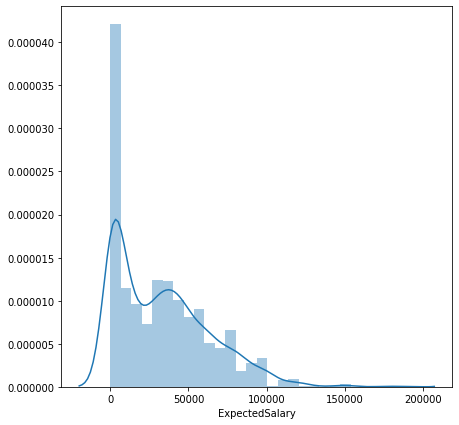

In [18]:
students=survey.loc[(survey.Professional=="Student").index]
students=students.ExpectedSalary.drop(students.loc[students.ExpectedSalary.isnull()].index)
plt.subplots(figsize=(7,7))
sns.distplot(students)
AverageSalary=np.mean(students)
print("Average Expected Salart="+str(AverageSalary))